# Redes Neurais: Problemas de Classificacao

Autor: Arthur Schneider Figueira

2. **(Com Nota)** Mushroom: problema binário. A base mushrooms.csv contém dados de **duas** espécies de cogumelos. A base está completamente criptografada e não há um dicionário.

**Projeto**:
* Testem diferentes arquiteturas para responder a esses problemas;
* Testem diferentes otimizadores;
* Dependendo da função de perda, adaptem o learning rate.

**Entrega:**
Realizem a predição da base mushrooms_AC.csv e salvem no drive da respectiva AC. Usem como nome do arquivo NOME_SOBRENOME_NOME2_SOBRENOME2.csv . Utilizem o formato padrão do pandas para exportar o arquivo.

A métrica para avaliar será a **acurácia**.

In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
label_encoder = LabelEncoder()

In [3]:
df_mushroom = pd.read_csv('mushrooms.csv')
df_val = pd.read_csv('mushrooms_AC.csv')

df_val['class'] = df_mushroom['class']

In [4]:
df_mushroom.tail()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
7495,x,y,e,t,n,f,c,b,w,t,...,g,p,p,w,o,p,n,v,d,e
7496,f,s,n,f,f,f,c,n,b,t,...,w,p,p,w,o,e,w,v,l,p
7497,x,f,g,f,n,f,w,b,n,t,...,w,w,p,w,o,e,n,s,g,e
7498,x,s,n,t,p,f,c,n,p,e,...,w,w,p,w,o,p,n,v,g,p
7499,x,s,n,t,p,f,c,n,w,e,...,w,w,p,w,o,p,k,s,u,p


In [5]:
df_val.tail()

,Unnamed: 0,index,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
619,619,4123,f,f,y,f,f,f,c,b,...,n,p,p,w,o,l,h,v,g,e
620,620,6993,f,s,e,f,y,f,c,n,...,p,p,p,w,o,e,w,v,d,e
621,621,246,x,s,w,t,l,f,w,n,...,w,w,p,w,o,p,u,v,d,p
622,622,7935,k,y,e,f,y,f,c,n,...,w,w,p,w,o,e,w,v,d,e
623,623,3018,f,y,e,t,n,f,c,b,...,g,w,p,w,o,p,n,v,d,p


In [6]:
for col in df_mushroom.columns:
    if df_mushroom[col].dtype == 'object':  # Verifique se a coluna é categórica
        df_mushroom[col] = label_encoder.fit_transform(df_mushroom[col])

In [7]:
for col in df_val.columns:
    if df_val[col].dtype == 'object':  # Verifique se a coluna é categórica
        df_val[col] = label_encoder.fit_transform(df_val[col])

In [8]:
df_mushroom.tail()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
7495,5,3,2,1,5,1,0,0,10,1,...,3,6,0,2,1,4,3,4,0,0
7496,2,2,4,0,2,1,0,1,0,1,...,7,6,0,2,1,0,7,4,2,1
7497,5,0,3,0,5,1,1,0,5,1,...,7,7,0,2,1,0,3,3,1,0
7498,5,2,4,1,6,1,0,1,7,0,...,7,7,0,2,1,4,3,4,1,1
7499,5,2,4,1,6,1,0,1,10,0,...,7,7,0,2,1,4,2,3,5,1


In [9]:
df_val.tail()

,Unnamed: 0,index,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
619,619,4123,1,0,9,0,2,1,0,0,...,4,6,0,2,1,2,1,4,1,0
620,620,6993,1,1,2,0,8,1,0,1,...,6,6,0,2,1,0,7,4,0,0
621,621,246,4,1,8,1,3,1,1,1,...,7,7,0,2,1,4,6,4,0,1
622,622,7935,2,2,2,0,8,1,0,1,...,7,7,0,2,1,0,7,4,0,0
623,623,3018,1,2,2,1,5,1,0,0,...,3,7,0,2,1,4,3,4,0,1


In [10]:
df_mushroom['class'].nunique()

2

In [11]:
len(df_mushroom)

7500

In [12]:
df_mushroom['class'].unique()

array([0, 1])

In [13]:
X = df_mushroom.drop(columns = ['class'])
y = df_mushroom[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(X)*0.3), random_state=2023,stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=10, random_state=2023,stratify=y_test)


In [14]:
print(f" Treino {len(X_train)}, Teste {len(X_test)}, Validacao {len(df_val)}")

 Treino 5250, Teste 2240, Validacao 624


In [15]:
# Incluindo early stopping

# Defina o callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Métrica a ser monitorada
    patience=50,          # Número de épocas sem melhoria antes de parar o treinamento
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

In [16]:
# Definindo a função para agendar o learning rate
def lr_scheduler(epoch):
    if epoch < 50:
        return 0.005
    elif epoch < 100:
        return 0.001
    elif epoch < 150:
        return 0.0005
    else:
        return 0.0001

# Criando o callback para o Learning Rate Scheduler
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Optei por alterar o learning rate a cada 50 epocas,
# pois o early stop vai encerrar o treinamento quando 50 epocas se passarem sem melhorar o modelo.

# SGD

In [17]:
# Crie o modelo sequencial
model1 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model1.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model1.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model1.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model1.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model1.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model1.compile(optimizer=tf.keras.optimizers.SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8

In [19]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=50,start_from_epoch=5,restore_best_weights=True,)

history1 = model1.fit(X_train.values, y_train, epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[earlyStopping],
                    validation_data=(X_test.values, y_test)
                    )

Epoch 1/200


3/3 [==============================] - 1s 115ms/step - loss: 0.6902 - accuracy: 0.5878 - val_loss: 0.6759 - val_accuracy: 0.7652
Epoch 2/200
3/3 [==============================] - 0s 38ms/step - loss: 0.6722 - accuracy: 0.7514 - val_loss: 0.6620 - val_accuracy: 0.7580
Epoch 3/200
3/3 [==============================] - 0s 38ms/step - loss: 0.6602 - accuracy: 0.7436 - val_loss: 0.6509 - val_accuracy: 0.7513
Epoch 4/200
3/3 [==============================] - 0s 39ms/step - loss: 0.6501 - accuracy: 0.7394 - val_loss: 0.6407 - val_accuracy: 0.7491
Epoch 5/200
3/3 [==============================] - 0s 44ms/step - loss: 0.6408 - accuracy: 0.7368 - val_loss: 0.6308 - val_accuracy: 0.7473
Epoch 6/200
3/3 [==============================] - 0s 45ms/step - loss: 0.6317 - accuracy: 0.7354 - val_loss: 0.6212 - val_accuracy: 0.7496
Epoch 7/200
3/3 [==============================] - 0s 40ms/step - loss: 0.6229 - accuracy: 0.7368 - val_loss: 0.6120 - val_accuracy: 0.7536
Epoch 8/200
3/3 [==============

In [20]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss1 = history1.history['loss']
test_loss1 = history1.history['val_loss']

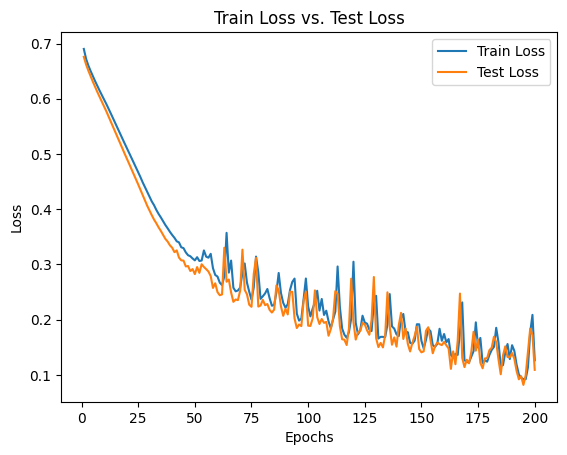

In [21]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss1) + 1)
plt.plot(epochs, train_loss1, label='Train Loss')
plt.plot(epochs, test_loss1, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

# Adam

In [22]:
# Crie o modelo sequencial
model2 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model2.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history2 = model2.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )

Epoch 1/200
3/3 [==============================] - 1s 117ms/step - loss: 0.9831 - accuracy: 0.4890 - val_loss: 0.6850 - val_accuracy: 0.5179 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 46ms/step - loss: 0.6586 - accuracy: 0.6516 - val_loss: 0.6152 - val_accuracy: 0.5415 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 45ms/step - loss: 0.5362 - accuracy: 0.6901 - val_loss: 0.4049 - val_accuracy: 0.8263 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 45ms/step - loss: 0.3909 - accuracy: 0.8330 - val_loss: 0.2746 - val_accuracy: 0.9036 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 50ms/step - loss: 0.2795 - accuracy: 0.8928 - val_loss: 0.2591 - val_accuracy: 0.9085 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 46ms/step - loss: 0.2500 - accuracy: 0.9055 - val_loss: 0.2256 - val_accuracy: 0.9174 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 45ms/step - loss: 0.1982 - 

In [24]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']

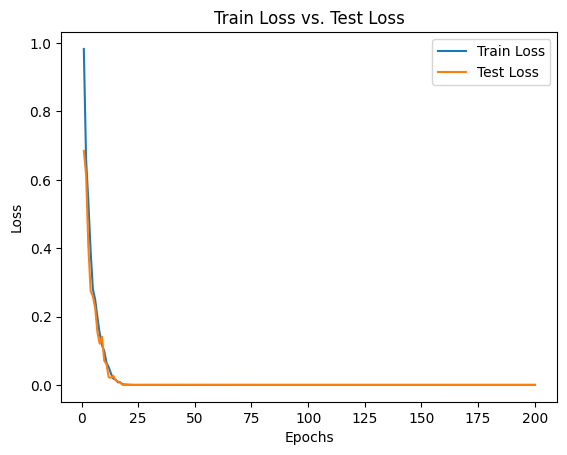

In [25]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss2) + 1)
plt.plot(epochs, train_loss2, label='Train Loss')
plt.plot(epochs, test_loss2, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

# RMSprop

In [26]:
# Crie o modelo sequencial
model3 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model3.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model3.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model3.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model3.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model3.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model3.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history3 = model3.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )

Epoch 1/200
3/3 [==============================] - 1s 110ms/step - loss: 5.1825 - accuracy: 0.5469 - val_loss: 0.6949 - val_accuracy: 0.5179 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 41ms/step - loss: 0.6838 - accuracy: 0.5282 - val_loss: 0.7525 - val_accuracy: 0.4821 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 45ms/step - loss: 0.7377 - accuracy: 0.5006 - val_loss: 0.6173 - val_accuracy: 0.5179 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 43ms/step - loss: 0.6273 - accuracy: 0.6720 - val_loss: 0.5967 - val_accuracy: 0.8295 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 41ms/step - loss: 0.5403 - accuracy: 0.8088 - val_loss: 2.5393 - val_accuracy: 0.5179 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 44ms/step - loss: 1.3137 - accuracy: 0.6848 - val_loss: 0.5057 - val_accuracy: 0.8558 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 43ms/step - loss: 0.4692 - 

In [28]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss3 = history3.history['loss']
test_loss3 = history3.history['val_loss']

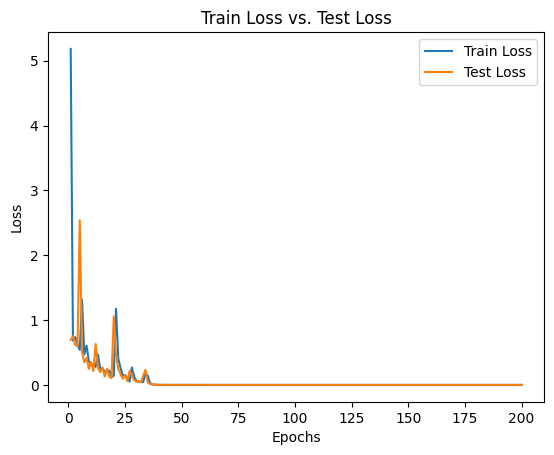

In [29]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss3) + 1)
plt.plot(epochs, train_loss3, label='Train Loss')
plt.plot(epochs, test_loss3, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

# Adagrad

In [30]:
# Crie o modelo sequencial
model4 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model4.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model4.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model4.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model4.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model4.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model4.compile(optimizer=tf.keras.optimizers.Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
history4 = model4.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )

Epoch 1/200
3/3 [==============================] - 1s 110ms/step - loss: 0.6903 - accuracy: 0.5181 - val_loss: 0.6739 - val_accuracy: 0.5183 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 44ms/step - loss: 0.6694 - accuracy: 0.5187 - val_loss: 0.6544 - val_accuracy: 0.5237 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 49ms/step - loss: 0.6520 - accuracy: 0.5465 - val_loss: 0.6377 - val_accuracy: 0.7125 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 52ms/step - loss: 0.6365 - accuracy: 0.7149 - val_loss: 0.6218 - val_accuracy: 0.7558 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 48ms/step - loss: 0.6219 - accuracy: 0.7457 - val_loss: 0.6062 - val_accuracy: 0.7634 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 45ms/step - loss: 0.6073 - accuracy: 0.7528 - val_loss: 0.5893 - val_accuracy: 0.7946 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 46ms/step - loss: 0.5917 - 

In [32]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss4 = history4.history['loss']
test_loss4 = history4.history['val_loss']

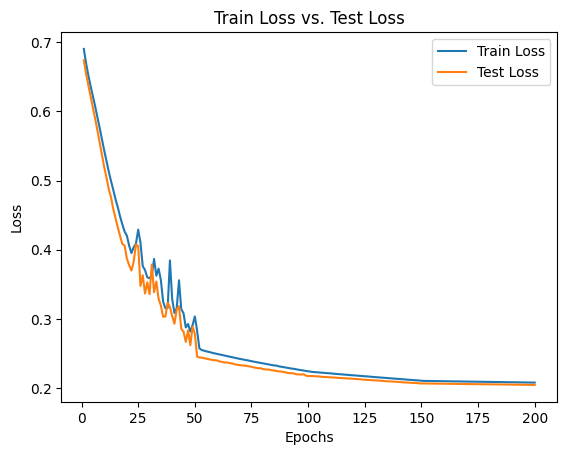

In [33]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss4) + 1)
plt.plot(epochs, train_loss4, label='Train Loss')
plt.plot(epochs, test_loss4, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

# Ada delta

In [34]:
# Crie o modelo sequencial
model5 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model5.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model5.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model5.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model5.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model5.compile(optimizer=tf.keras.optimizers.Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history5 = model5.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )

Epoch 1/200
3/3 [==============================] - 1s 112ms/step - loss: 0.6901 - accuracy: 0.5994 - val_loss: 0.6863 - val_accuracy: 0.6371 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 49ms/step - loss: 0.6865 - accuracy: 0.6371 - val_loss: 0.6825 - val_accuracy: 0.6670 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 48ms/step - loss: 0.6829 - accuracy: 0.6678 - val_loss: 0.6788 - val_accuracy: 0.6879 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 48ms/step - loss: 0.6793 - accuracy: 0.6834 - val_loss: 0.6751 - val_accuracy: 0.6942 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 59ms/step - loss: 0.6759 - accuracy: 0.6840 - val_loss: 0.6716 - val_accuracy: 0.6951 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 50ms/step - loss: 0.6725 - accuracy: 0.6838 - val_loss: 0.6681 - val_accuracy: 0.6969 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 52ms/step - loss: 0.6691 - 

In [36]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss5 = history5.history['loss']
test_loss5 = history5.history['val_loss']

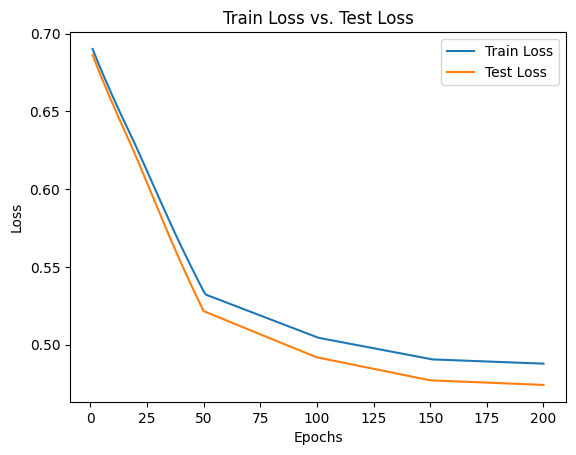

In [37]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss5) + 1)
plt.plot(epochs, train_loss5, label='Train Loss')
plt.plot(epochs, test_loss5, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

# N Adam

In [38]:
# Crie o modelo sequencial
model6 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model6.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model6.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model6.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model6.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model6.compile(optimizer=tf.keras.optimizers.Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
history6 = model6.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )

Epoch 1/200
3/3 [==============================] - 2s 107ms/step - loss: 1.1692 - accuracy: 0.5158 - val_loss: 0.6965 - val_accuracy: 0.4821 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 44ms/step - loss: 0.6213 - accuracy: 0.6712 - val_loss: 0.4314 - val_accuracy: 0.8040 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 43ms/step - loss: 1.4891 - accuracy: 0.7141 - val_loss: 0.4550 - val_accuracy: 0.8768 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 46ms/step - loss: 0.4533 - accuracy: 0.8450 - val_loss: 0.2921 - val_accuracy: 0.8853 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 44ms/step - loss: 0.2781 - accuracy: 0.8924 - val_loss: 1.0020 - val_accuracy: 0.8138 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 44ms/step - loss: 0.5949 - accuracy: 0.8579 - val_loss: 0.2508 - val_accuracy: 0.9219 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 49ms/step - loss: 0.2361 - 

In [40]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss6 = history6.history['loss']
test_loss6 = history6.history['val_loss']

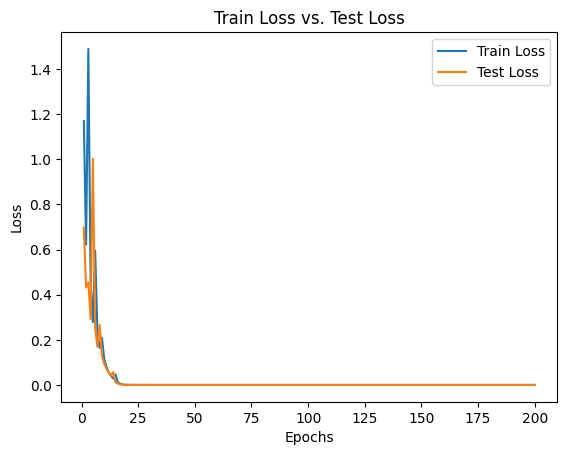

In [41]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss6) + 1)
plt.plot(epochs, train_loss6, label='Train Loss')
plt.plot(epochs, test_loss6, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

# Avaliação

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
[float(x) for x in model1.predict(X_val)]

1/1 [==============================] - 0s 97ms/step


[0.9800038933753967,
 0.9960895776748657,
 0.061750952154397964,
 0.139186829328537,
 0.9965870380401611,
 0.014270312152802944,
 0.9930288195610046,
 0.9981923699378967,
 0.20885631442070007,
 0.3073303997516632]

In [44]:
transforma_bin = lambda x: 1 if x > 0.5 else 0

In [45]:
print('SGD',accuracy_score(y_val, [transforma_bin(float(x)) for x in model1.predict(X_val)]))
print('Adam',accuracy_score(y_val, [transforma_bin(float(x)) for x in model2.predict(X_val)]))
print('RMSProp',accuracy_score(y_val, [transforma_bin(float(x)) for x in model3.predict(X_val)]))
print('Ada Grad',accuracy_score(y_val, [transforma_bin(float(x)) for x in model4.predict(X_val)]))
print('Ada Delta',accuracy_score(y_val, [transforma_bin(float(x)) for x in model5.predict(X_val)]))
print('N Adam',accuracy_score(y_val, [transforma_bin(float(x)) for x in model6.predict(X_val)]))

1/1 [==============================] - 0s 16ms/step


SGD 1.0
1/1 [==============================] - 0s 75ms/step
Adam 1.0
1/1 [==============================] - 0s 63ms/step
RMSProp 1.0
1/1 [==============================] - 0s 66ms/step
Ada Grad 1.0
1/1 [==============================] - 0s 62ms/step
Ada Delta 0.8
1/1 [==============================] - 0s 66ms/step
N Adam 1.0


In [46]:
print('SGD: teste',accuracy_score(y_test, [transforma_bin(float(x)) for x in model1.predict(X_test)]))
print('SGD: treino',accuracy_score(y_train, [transforma_bin(float(x)) for x in model1.predict(X_train)]))


70/70 [==============================] - 0s 1ms/step
SGD: teste 0.9651785714285714
165/165 [==============================] - 0s 1ms/step
SGD: treino 0.9723809523809523


In [47]:
print('Adam: teste',accuracy_score(y_test, [transforma_bin(float(x)) for x in model2.predict(X_test)]))
print('Adam: treino',accuracy_score(y_train, [transforma_bin(float(x)) for x in model2.predict(X_train)]))

70/70 [==============================] - 0s 1ms/step
Adam: teste 1.0
165/165 [==============================] - 0s 1ms/step
Adam: treino 1.0


In [48]:
print('RMSProp: teste',accuracy_score(y_test, [transforma_bin(float(x)) for x in model3.predict(X_test)]))
print('RMSProp: treino',accuracy_score(y_train, [transforma_bin(float(x)) for x in model3.predict(X_train)]))

 1/70 [..............................] - ETA: 0s

70/70 [==============================] - 0s 1ms/step
RMSProp: teste 1.0
165/165 [==============================] - 0s 1ms/step
RMSProp: treino 1.0


In [49]:
print('Ada Grad: teste',accuracy_score(y_test, [transforma_bin(float(x)) for x in model4.predict(X_test)]))
print('Ada Grad: treino',accuracy_score(y_train, [transforma_bin(float(x)) for x in model4.predict(X_train)]))

70/70 [==============================] - 0s 1ms/step
Ada Grad: teste 0.928125
165/165 [==============================] - 0s 1ms/step
Ada Grad: treino 0.9304761904761905


In [50]:
print('Ada Delta: teste',accuracy_score(y_test, [transforma_bin(float(x)) for x in model5.predict(X_test)]))
print('Ada Delta: treino',accuracy_score(y_train, [transforma_bin(float(x)) for x in model5.predict(X_train)]))

 1/70 [..............................] - ETA: 0s

70/70 [==============================] - 0s 1ms/step
Ada Delta: teste 0.8433035714285714
165/165 [==============================] - 0s 994us/step
Ada Delta: treino 0.8251428571428572


In [51]:
print('N Adam: teste',accuracy_score(y_test, [transforma_bin(float(x)) for x in model6.predict(X_test)]))
print('N Adam: treino',accuracy_score(y_train, [transforma_bin(float(x)) for x in model6.predict(X_train)]))

70/70 [==============================] - 0s 1ms/step
N Adam: teste 1.0
165/165 [==============================] - 0s 1ms/step
N Adam: treino 1.0


In [52]:
df_val.dtypes

Unnamed: 0                  int64
index                       int64
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
class                       int32
dtype: object

In [53]:
df_val1 = df_val[["cap-shape", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat", "class"]]

In [54]:
df_res = df_val[["index"]]

In [55]:
df_res.head()

,index
0,5023
1,741
2,6797
3,2088
4,4771


In [56]:
res = model1.predict(df_val1)
res2 = model2.predict(df_val1)
res3 = model3.predict(df_val1)
res4 = model4.predict(df_val1)
res5 = model5.predict(df_val1)
res6 = model6.predict(df_val1)

20/20 [==============================] - 0s 1ms/step


20/20 [==============================] - 0s 1ms/step


In [57]:
limite = 0.5
labels = ['e' if p >= limite else 'p' for p in res]
df_res["CLASS_MODELO_1"] = labels

labels2 = ['e' if p >= limite else 'p' for p in res2]
df_res["CLASS_MODELO_2"] = labels2

labels3 = ['e' if p >= limite else 'p' for p in res3]
df_res["CLASS_MODELO_3"] = labels3

labels4 = ['e' if p >= limite else 'p' for p in res4]
df_res["CLASS_MODELO_4"] = labels4

labels5 = ['e' if p >= limite else 'p' for p in res5]
df_res["CLASS_MODELO_5"] = labels5

labels6 = ['e' if p >= limite else 'p' for p in res6]
df_res["CLASS_MODELO_6"] = labels6

C:\Users\andre\AppData\Local\Temp\ipykernel_15196\3850951309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res["CLASS_MODELO_1"] = labels
C:\Users\andre\AppData\Local\Temp\ipykernel_15196\3850951309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res["CLASS_MODELO_2"] = labels2
C:\Users\andre\AppData\Local\Temp\ipykernel_15196\3850951309.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [58]:
df_res.head()

,index,CLASS_MODELO_1,CLASS_MODELO_2,CLASS_MODELO_3,CLASS_MODELO_4,CLASS_MODELO_5,CLASS_MODELO_6
0,5023,e,e,e,e,e,e
1,741,e,e,e,e,e,e
2,6797,p,p,p,p,e,p
3,2088,p,e,e,p,p,e
4,4771,p,e,e,e,e,e


In [59]:
df_res.to_csv("Andre_Toledo_Caio_Santos.csv", index=False)